# Question 3

Write Python code to build a neural network with the following details. 

    - Input data = Iris dataset
    - Number of hidden layers = 1
    - Number of units in hidden layer = 5,10,15,20,25
    - Number of iterations = 5000
    - Learning rate = 0.0001
    - Learning algorithm = stochastic gradient descent
    - Activation = logistic 

1. Compare the training score for various hidden units. 
2. Plot the loss curve for various hidden units. 
3. Report execution time for various hidden units as a bar graph. (Use library time and time() method) 


## Expectations

1. Expected output: (approximately)
    - Training accuracy 5 is xx.xxx 
    - Training accuracy 10 is xx.xxx 
    - Training accuracy 15 is xx.xxx 
    - Training accuracy 20 is xx.xxx 
    - Training accuracy 25 is xx.xxx

2. Graph: Training Loss (Actual output may vary)
![title](images/op-hidden.png)

3. Bar graph: Execution Time (Actual output may vary)
![title](images/time-hidden.png)

You are expected to modify this notebook and upload the modified file as assignment submission.

<b> PS: Code written within the block will be evaluted. Other code will be ignored.
#### start code here
#### end code here

In [1]:
from sklearn import datasets  
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Iris dataset.

iris = datasets.load_iris()

# Extract all columns except last from the dataset for X values.
# y is the target column.

X = iris["data"][:,:-1]  
y = iris["target"]

# Split data into train and test

(X_train, X_test, y_train, y_test) = train_test_split(X, y, stratify=y, test_size= 0.3)

# normalise the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# Use the library function sklearn.neural_network.MLPClassifier 
from sklearn.neural_network import MLPClassifier
# Build neural network for various hidden units. (max 10 lines of code) Use loop.

# start code here
def mlpClassifier(hidden_units):
    mlp = MLPClassifier(hidden_layer_sizes=(hidden_units), max_iter=5000, activation='logistic',
                solver='sgd',  random_state=1,
                learning_rate_init=0.0001)
    return mlp

for hidden_units in [5,10,15,20,25]:
    mlp=mlpClassifier(hidden_units)
    mlp.fit(X_train, y_train)

# end code here

In [66]:
# Compare the training  score for various hidden units. (max 2 lines of code) Use loop.

# start code here
for hidden_units in [5,10,15,20,25]:
    mlp=mlpClassifier(hidden_units)
    mlp.fit(X_train, y_train)
    print("Training accuracy", hidden_units ,(mlp.score(X_train, y_train)))
# end code here

Training accuracy 5 0.3523809523809524
Training accuracy 10 0.3333333333333333
Training accuracy 15 0.26666666666666666
Training accuracy 20 0.3333333333333333
Training accuracy 25 0.37142857142857144


In [18]:
predictions = mlp.predict(X_test)
predictions

array([1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2,
       0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0,
       2])

Loss Curve for 5 1.0801086315149635
Loss Curve for 10 1.1010979261911016
Loss Curve for 15 1.1322874830498
Loss Curve for 20 1.1105725351964164
Loss Curve for 25 1.0893338999212545


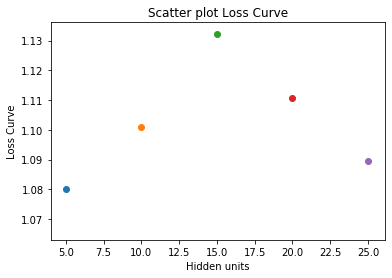

In [75]:
# Plot the loss curve for various hidden units. (max 5 lines of code) Use loop.

# start code here
for hidden_units in [5,10,15,20,25]:
    mlp=mlpClassifier(hidden_units)
    mlp.fit(X_train, y_train)
    print("Loss Curve for", hidden_units ,(mlp.loss_))
    
    plt.scatter(hidden_units, mlp.loss_,  alpha=1)
    plt.title('Scatter plot Loss Curve')
    plt.xlabel('Hidden units')
    plt.ylabel('Loss Curve')
# end code here

Time for  5 0.03125715255737305 seconds 
Time for  10 0.3954620361328125 seconds 
Time for  15 0.017781972885131836 seconds 
Time for  20 0.286182165145874 seconds 
Time for  25 0.4688720703125 seconds 


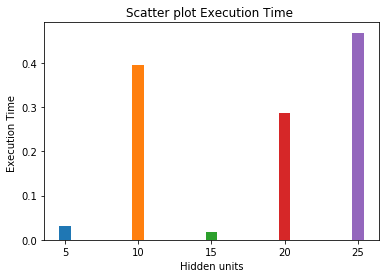

In [81]:
# Plot the execution time as bar graph. (max 5 lines of code)

# start code here
import time

for hidden_units in [5,10,15,20,25]:
    start_time = time.time()
    mlp=mlpClassifier(hidden_units)
    mlp.fit(X_train, y_train)
    y=time.time() - start_time
    print("Time for ",hidden_units,"%s seconds " % (time.time() - start_time))
    plt.bar(hidden_units, y )
    plt.title('Scatter plot Execution Time ')
    plt.xlabel('Hidden units')
    plt.ylabel('Execution Time ')
# end code here